# 타이타닉 생존율 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 데이터 파일 불러오기

In [2]:
df_train = pd.read_csv('../../데이터/train.csv')
df_test = pd.read_csv('../../데이터/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 데이터 요약값 보기

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 결측치 파악하기

In [8]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

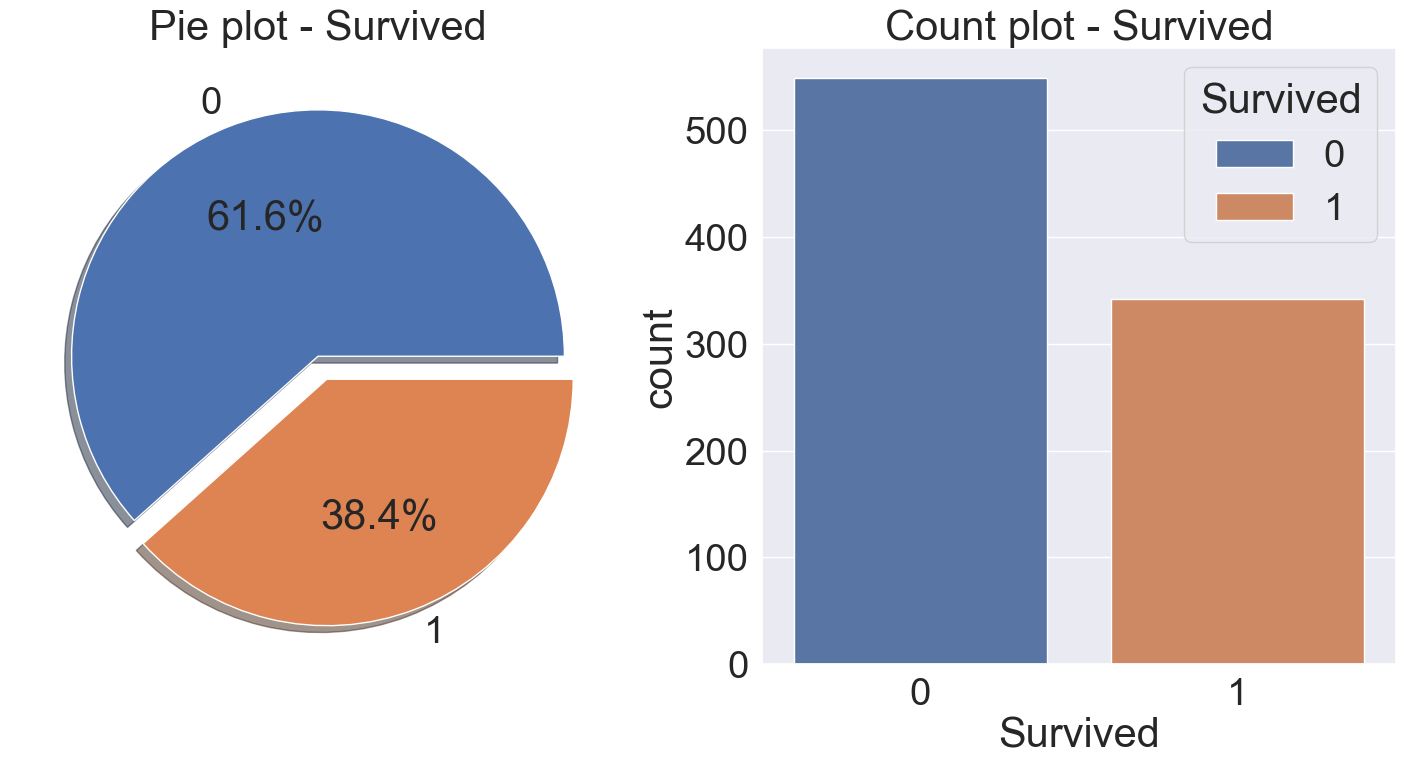

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

'''
df.plot.pie() 매개변수
ratio = [] : 원주율
labels = [] : 라벨
autopct='%.1f%%' : 부채꼴안에 표시될 숫자 형식 , 소수 첫째자리와 % 표시
strangle = : 부채꼴이 시작할 각도
counterclock = True/False : False일때 시계방향순서로 영역표시
explode=[] : 부채꼴이 중심으로부터 벗어나는거리
shadow = True/False : 그림자 유무
colors = [] : 색깔지정
wedgeprops = {} : 부채꼴 영역의 스타일 지정
'''

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## Pclass

In [11]:
# pclass 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [14]:
# mean을 사용하여 생존율 구하기
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass'>

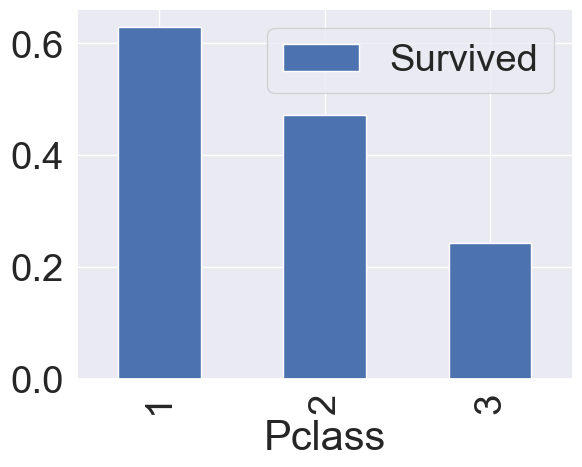

In [15]:
# 시각화
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

결과 : Pclass에 따라 생존여부가 달라지는 것을 알 수 있다.

## Sex

성별에 따른 생존율 분석

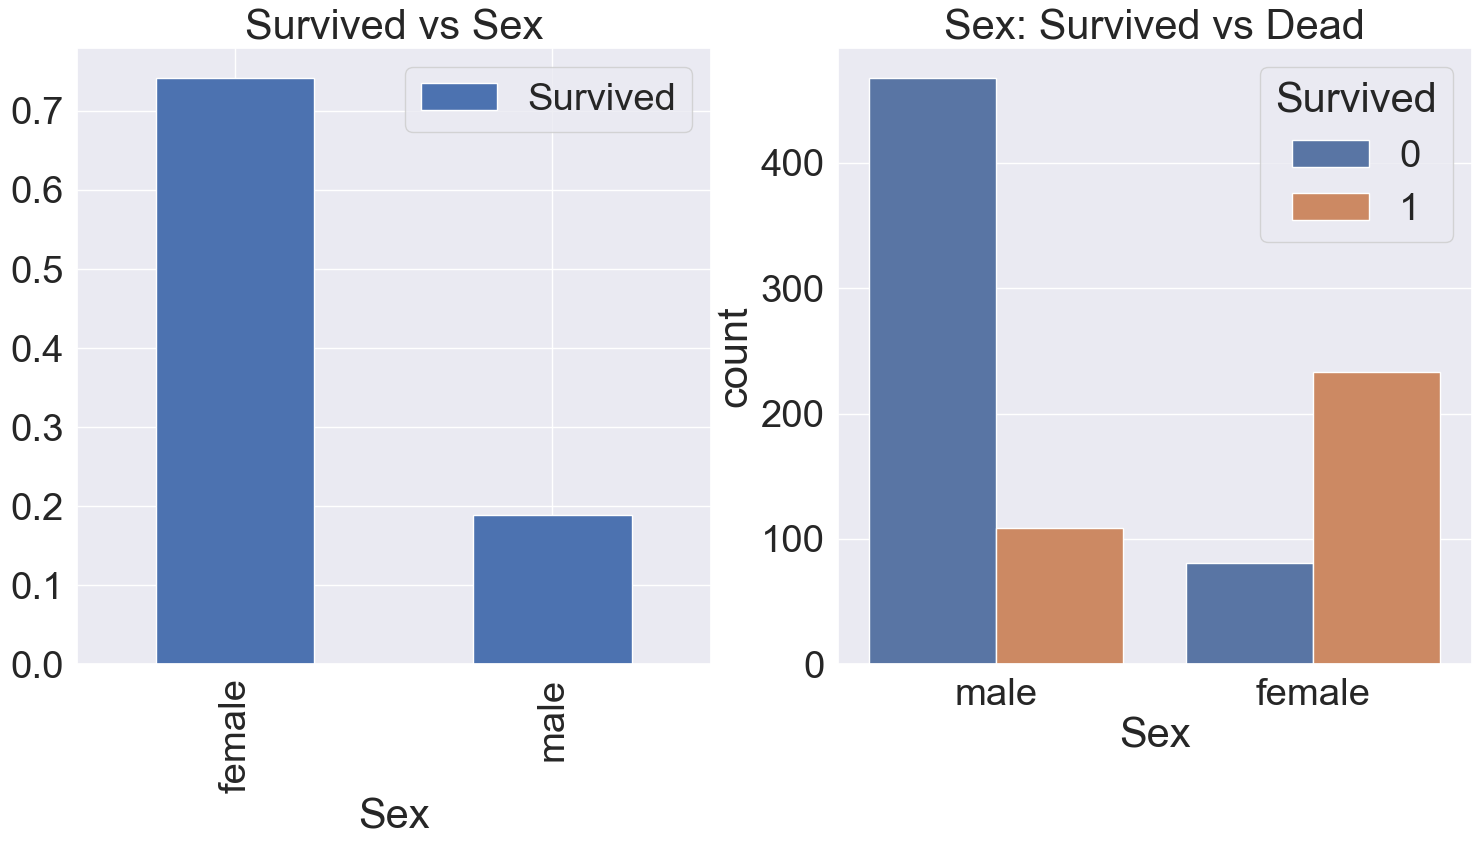

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

결과 : 여자의 생존율이 더욱 높은 것으로 보아 성별도 생존에 영향을 미치는 특성임을 알 수 있다.

## Pclass & Sex
Pclass와 성별에 따른 생존율 그래프

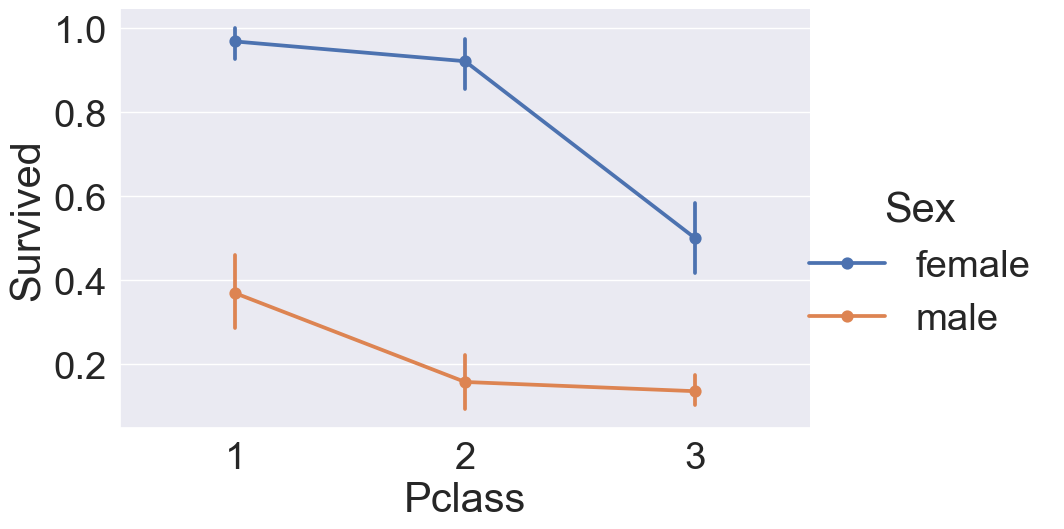

In [17]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=6, aspect=1.5)

format() : 숫자 자릿수 , 딕셔너리 형태로 지정 {주소값:자릿수}


## Age

In [18]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


### **kde**<br>
Kernel Density Estimator의 약자로 커널 밀도 추정이라는 뜻이다.<br>
데이터의 분포를 확인하기위하여 사용되고, 곡선으로 그려진다는 특징이 있다.

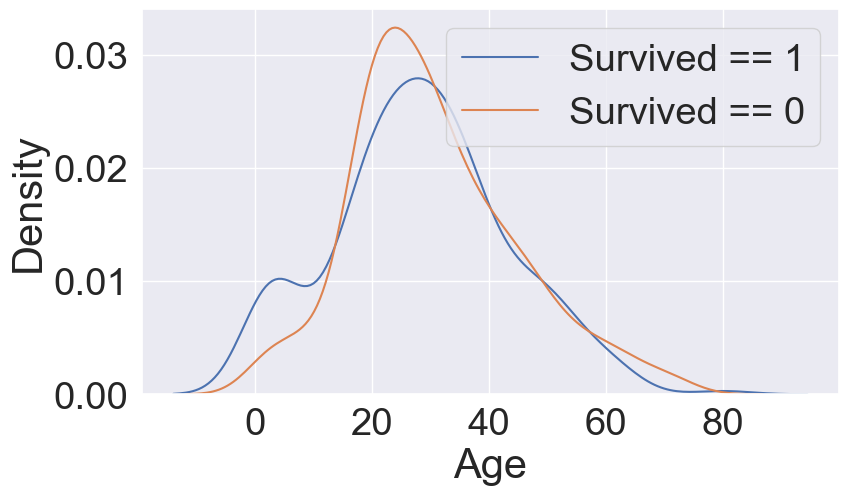

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

그래프를 보면 15세 미만의 구간에서 생존율이 상대적으로 높고<br>
20~30세 구간에서는 생존율이 낮은 것을 알 수 있다.

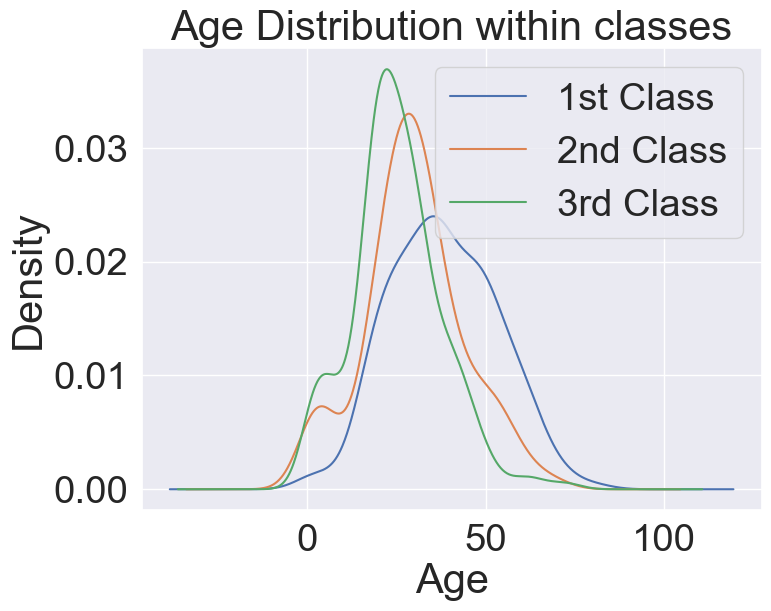

In [20]:
# 나이에 따른 클래스별 분포
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

* 특징 <br>
나이가 많아질 수록 클래스가 높아진다<br>


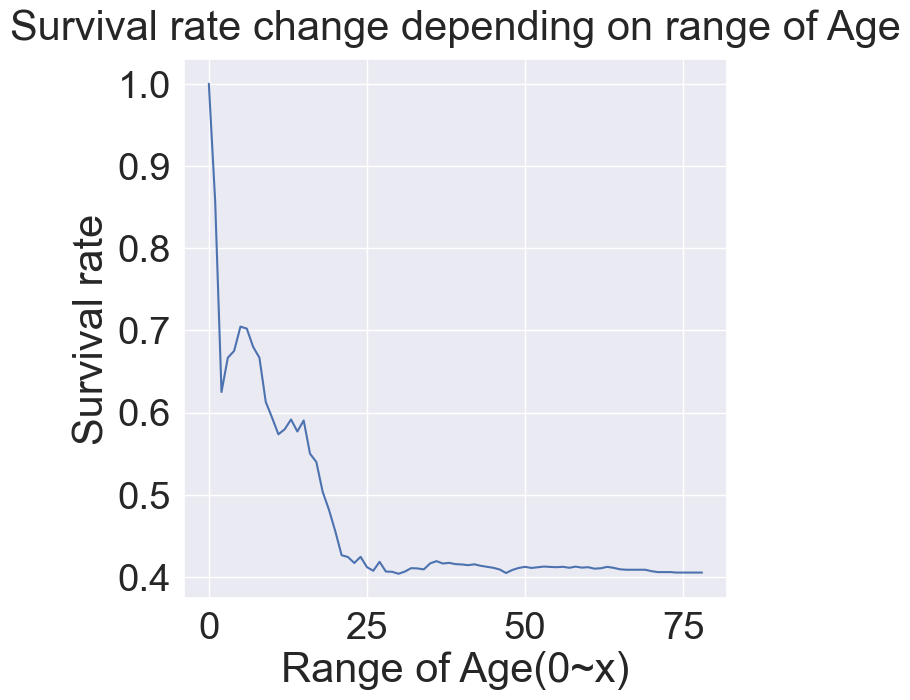

In [21]:
# 누적확률을 이용하여 나이에 따른 생존율 시각화
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

결과 : 나이가 어릴수록 생존율이 높은것을 조금 더 확실하게 알 수 있다.

# 특성 공학 (Feature Engineering)

## Fill Null

In [22]:
df_train["Age"].isnull().sum()

177

### 정규표현식
문자열.extract()로 추출 <br>
() 안에는 추출원하는 문자열 형태 지정<br>
'([A-Za-z]+)\.' 는 A부터Z , a부터z까지 입력된문자 + .으로 끝나는 문자 추출

In [23]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [24]:
# crosstab은 원하는 컬럼으로 교차표를 만들어주는 메소드
# .T를통해 행/열 변형
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [25]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [26]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


<Axes: xlabel='Initial'>

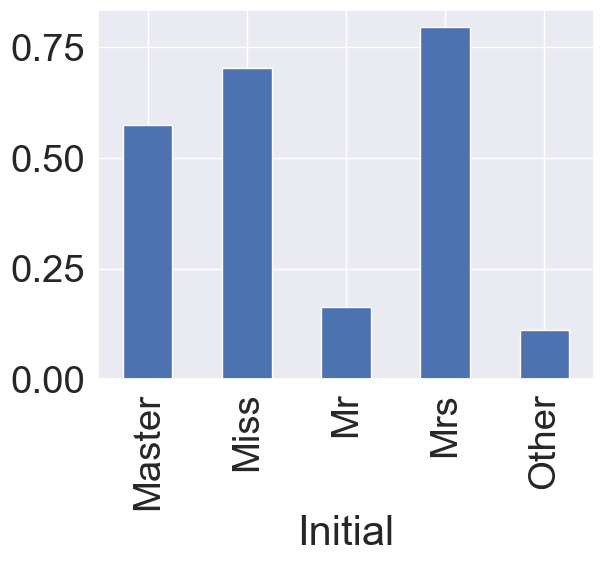

In [27]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

Statistics를 활용하여 Null을 채운다.<br>
statistics 는 train data의 것을 의미

### 각 initial 그룹별 Age 평균 값으로 null 채우기

In [28]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [29]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [30]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Fare       1
Cabin    327
dtype: int64

* 결과 : train 과 test 셋에 Age의 null은 모두 없앴음

## Initial & Embarked & Sex 수치화

현재 Initial은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져있다.<br>
이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋 시킬때는 컴퓨터가 인식할 수 있도록 **수치화** 시켜야 한다.

In [31]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

Embarked & Sex 도 동일한 방법으로 **수치화**

In [32]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [33]:
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes

(True, dtype('float64'))

In [34]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

## 히트맵그래프를 통해 Feature간의 상관관계 확인하기

r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,<br>
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,<br>
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,<br>
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,<br>
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,<br>
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,<br>
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계


In [35]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial'],
      dtype='object')

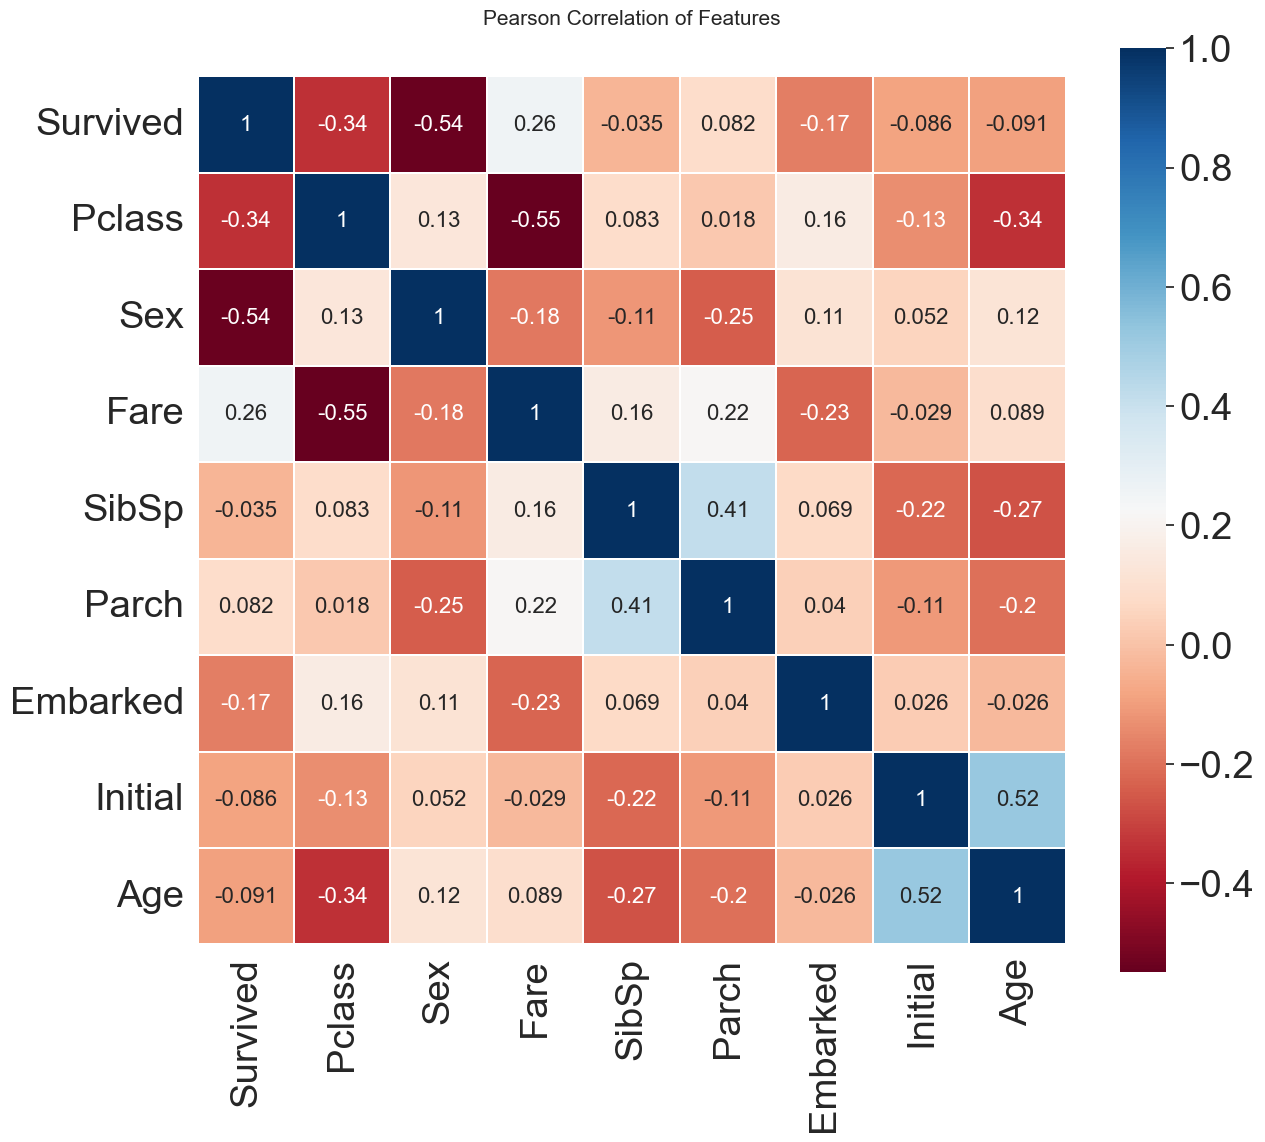

In [36]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Initial', 'Age']] 

# plt.cm.색깔명 은 색깔을 자동으로 지정해주는 함수
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

**결과** : 상관관계를 보이는것을 뽑아보자면 <br>
Survived 와 Fare : -0.54<br>
Survived 와 Sex : -0.34<br>
Pclass 와 Fare : -0.67<br>
Pclass 와 Age : -0.34<br>
등이 있다.

## Drop Columns
필요없는 피쳐 삭제

In [37]:
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'Ticket', 'Cabin'], axis=1, inplace=True)

In [38]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2.0,2
1,1,1,0,38.0,1,0,71.2833,0.0,3
2,1,3,0,26.0,0,0,7.9250,2.0,1
3,1,1,0,35.0,1,0,53.1000,2.0,3
4,0,3,1,35.0,0,0,8.0500,2.0,2


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
 8   Initial   891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Initial   418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


# 모델 개발 및 학습

In [41]:
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.

## 학습을위한 train, valid, test set 분류

train은 훈련데이터셋<br>
valid는 검증데이터셋<br>
test는 학습데이터셋<br>

In [42]:
df_train.drop('Survived', axis=1).values

array([[ 3.    ,  1.    , 22.    , ...,  7.25  ,  2.    ,  2.    ],
       [ 1.    ,  0.    , 38.    , ..., 71.2833,  0.    ,  3.    ],
       [ 3.    ,  0.    , 26.    , ...,  7.925 ,  2.    ,  1.    ],
       ...,
       [ 3.    ,  0.    , 22.    , ..., 23.45  ,  2.    ,  1.    ],
       [ 1.    ,  1.    , 26.    , ..., 30.    ,  0.    ,  2.    ],
       [ 3.    ,  1.    , 32.    , ...,  7.75  ,  1.    ,  2.    ]])

In [43]:
# train 에는 Survived 컬럼을 제외한 나머지 컬럼들
X_train = df_train.drop('Survived', axis=1).values
# target 에는 Survived 컬럼만
target_label = df_train['Survived'].values
# test에는 df_test에 Survived컬럼을 제외하고 들어가 있기 때문에 그대로 값 저장
X_test = df_test.values

In [44]:
X_train.shape, X_test.shape

((891, 8), (418, 8))

In [45]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)

In [46]:
y_tr.shape, y_vld.shape

((712,), (179,))

In [47]:
X_tr.shape, X_vld.shape , y_tr.shape , y_vld.shape

((712, 8), (179, 8), (712,), (179,))

In [48]:
y_tr

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

## 랜덤포레스트 모델 생성 및 학습

In [49]:
model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [50]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 82.12% 정확도로 생존을 맞춤


* 결과 : 파라미터 튜닝없이 랜덤포레스트분류를 통해 학습시켰더니 81%의 정확도가 나타남

In [51]:
model = RandomForestClassifier(n_estimators=10,
                               max_depth = 10,
                               min_samples_leaf = 6,
                               min_samples_split = 8,
                               n_jobs=-1)
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 82.12% 정확도로 생존을 맞춤


[캐글 타이타닉](https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=voteCount&excludeNonAccessedDatasources=true)